<a href="https://colab.research.google.com/github/rx7k-uae/TestFinalProject/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load **Dataset** and Perform Sample **Descriptive** Analysis

In [1]:
import pandas as pd


df = pd.read_csv('Cancer.csv')


def descriptive_stats(sample, field):
    stats = {
        'Count': sample[field].count(),
        'Mean': sample[field].mean(),
        'Standard Deviation': sample[field].std(),
        'Minimum': sample[field].min(),
        '25th Percentile': sample[field].quantile(0.25),
        'Median': sample[field].median(),
        '75th Percentile': sample[field].quantile(0.75),
        'Maximum': sample[field].max()
    }
    return pd.Series(stats)


random_sample = df.sample(n=150, random_state=42)


random_stats = descriptive_stats(random_sample, 'Age')

print("Random Sample Descriptive Statistics:\n", random_stats)


Random Sample Descriptive Statistics:
 Count                 150.000000
Mean                   52.266667
Standard Deviation     21.155756
Minimum                18.000000
25th Percentile        34.000000
Median                 50.500000
75th Percentile        72.750000
Maximum                89.000000
dtype: float64


Load **Dataset** and Perform **Systematic** Sampling with Descriptive Analysis

In [2]:
import pandas as pd

df = pd.read_csv('Cancer.csv')

def descriptive_stats(sample, field):
    stats = {
        'Count': sample[field].count(),
        'Mean': sample[field].mean(),
        'Standard Deviation': sample[field].std(),
        'Minimum': sample[field].min(),
        '25th Percentile': sample[field].quantile(0.25),
        'Median': sample[field].median(),
        '75th Percentile': sample[field].quantile(0.75),
        'Maximum': sample[field].max()
    }
    return pd.Series(stats)

filtered_df = df[df['Age'] < 80]

step = max(len(filtered_df) // 150, 1)
systematic_sample = filtered_df.iloc[::step].head(150)

systematic_stats = descriptive_stats(systematic_sample, 'Age')
print(systematic_stats)


Count                 150.00000
Mean                   48.62000
Standard Deviation     18.48441
Minimum                18.00000
25th Percentile        32.25000
Median                 49.00000
75th Percentile        65.00000
Maximum                79.00000
dtype: float64


In [3]:


# ---------- Age ----------
age_stats = descriptive_stats(df, 'Age')
print("Descriptive Statistics for Age:\n")
for key, value in age_stats.items():
    print(f"{key:<10}: {value:.3f}")

# ---------- Weight ----------
weight_stats = descriptive_stats(df, 'Weight')
print("\nDescriptive Statistics for Weight:\n")
for key, value in weight_stats.items():
    print(f"{key:<10}: {value:.3f}")

# ---------- Height ----------
height_stats = descriptive_stats(df, 'Height')
print("\nDescriptive Statistics for Height:\n")
for key, value in height_stats.items():
    print(f"{key:<10}: {value:.3f}")



Descriptive Statistics for Age:

Count     : 900.000
Mean      : 53.430
Standard Deviation: 20.658
Minimum   : 18.000
25th Percentile: 35.000
Median    : 54.000
75th Percentile: 71.000
Maximum   : 89.000

Descriptive Statistics for Weight:

Count     : 900.000
Mean      : 70.104
Standard Deviation: 14.117
Minimum   : 18.000
25th Percentile: 60.000
Median    : 71.000
75th Percentile: 80.000
Maximum   : 116.000

Descriptive Statistics for Height:

Count     : 900.000
Mean      : 169.259
Standard Deviation: 10.154
Minimum   : 138.000
25th Percentile: 162.000
Median    : 169.000
75th Percentile: 176.000
Maximum   : 199.000


**Visualize** Relationship Between **Height** and **Weight**

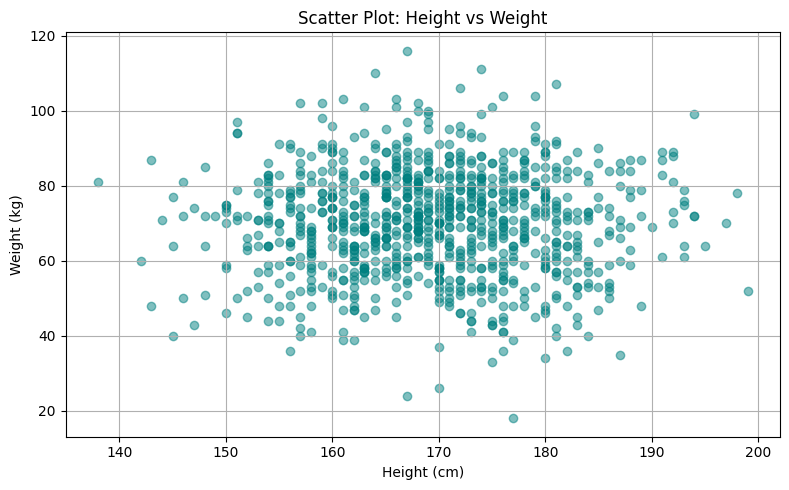

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Height'], df['Weight'], alpha=0.5, color='teal')
plt.title("Scatter Plot: Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


Box Plot **Visualization** for **Age** and **Height**

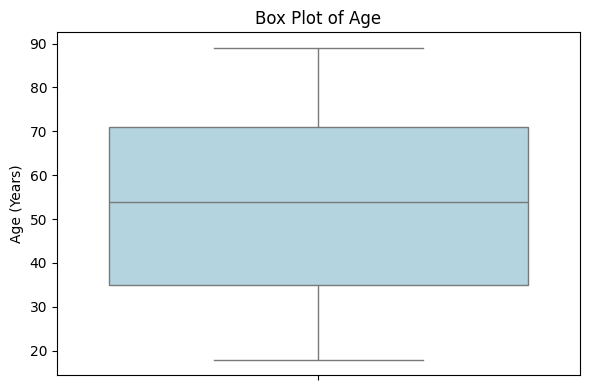

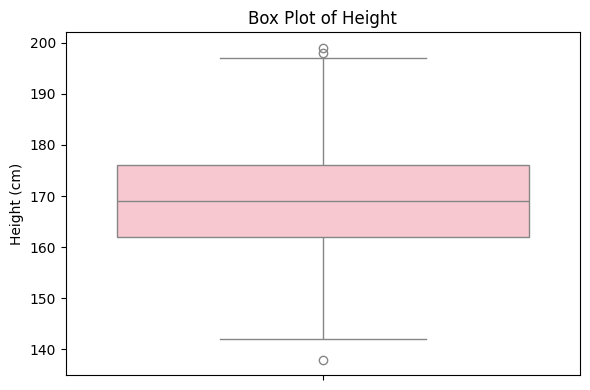

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Age'], color='lightblue')
plt.title("Box Plot of Age")
plt.ylabel("Age (Years)")
plt.tight_layout()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Height'], color='pink')
plt.title("Box Plot of Height")
plt.ylabel("Height (cm)")
plt.tight_layout()
plt.show()



**Histogram** Visualization for **Age** and **Weight**

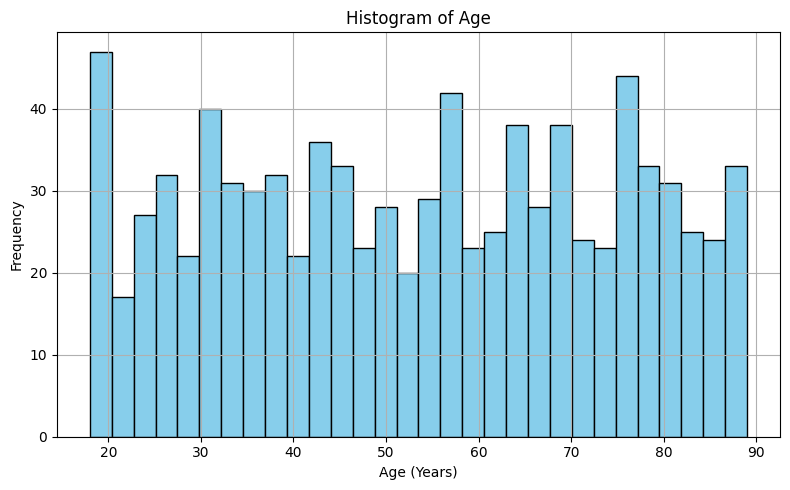

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()





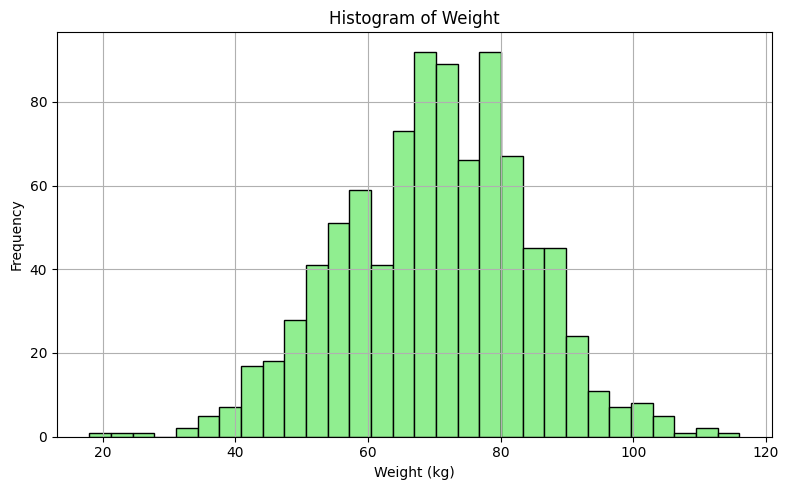

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Weight'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram of Weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

HEAT MAP: Correlation Matrix


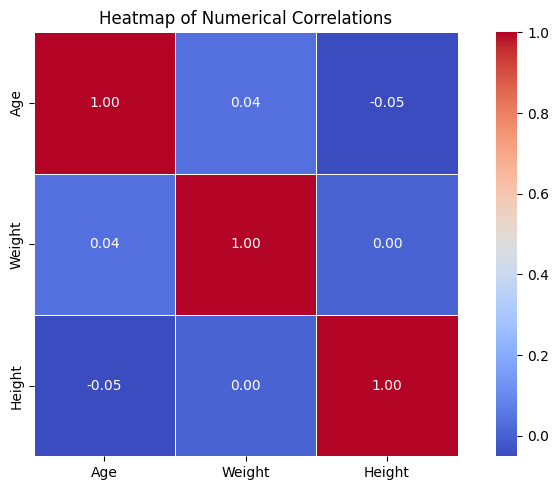

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.7,
    square=True
)

plt.title("Heatmap of Numerical Correlations")
plt.tight_layout()
plt.show()


**Correlation** Analysis Between **Age** and **Weight**

In [9]:

from scipy.stats import pearsonr, spearmanr

df_clean = df[['Age', 'Weight']].dropna()

# Pearson Correlation
pearson_corr, pearson_p = pearsonr(df_clean['Age'], df_clean['Weight'])

# Spearman Correlation
spearman_corr, spearman_p = spearmanr(df_clean['Age'], df_clean['Weight'])

print("Pearson Correlation between Age and Weight:")
print(f"Correlation Coefficient: {pearson_corr:.4f}, P-value: {pearson_p:.4e}")

print("\nSpearman Correlation between Age and Weight:")
print(f"Correlation Coefficient: {spearman_corr:.4f}, P-value: {spearman_p:.4e}")




Pearson Correlation between Age and Weight:
Correlation Coefficient: 0.0379, P-value: 2.5649e-01

Spearman Correlation between Age and Weight:
Correlation Coefficient: 0.0354, P-value: 2.8810e-01


**Chi-Square** Test of Independence: **Cancer Type** vs **Smoking Status**

In [10]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['Cancer_Type'], df['Smoking_Status'])
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-Square Test between Cancer Type and Smoking Status:")
print(f"Chi-Square Value: {chi2:.4f}, P-value: {p:.4e}")


Chi-Square Test between Cancer Type and Smoking Status:
Chi-Square Value: 9.8810, P-value: 7.7083e-01


**Chi-Square** Test Between **Smoking Statu**s and** Age Group**

In [11]:
df['Age_Group'] = pd.qcut(df['Age'], q=2, labels=["Low", "High"])
contingency_table = pd.crosstab(df['Smoking_Status'], df['Age_Group'])
print(contingency_table)


from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of Freedom: {dof}")


Age_Group       Low  High
Smoking_Status           
Former Smoker    83    83
Non-Smoker      237   227
Smoker          136   134
Chi-Square Value: 0.0703
P-value: 9.6544e-01
Degrees of Freedom: 2


In [12]:
# Step 5: Output results
print("Contingency Table:")
print(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")


Contingency Table:
Age_Group       Low  High
Smoking_Status           
Former Smoker    83    83
Non-Smoker      237   227
Smoker          136   134

Chi-Square Test Results:
Chi2 Statistic: 0.0703
Degrees of Freedom: 2
P-value: 0.9654


One-Sample **T-Test** on Age

In [13]:
import numpy as np
from scipy import stats
import pandas as pd
from scipy import stats

# Get dataset mean from the full dataset
dataset_mean = df['Age'].mean()

sample_size = 150
sample_data = df['Age'].sample(n=sample_size, random_state=42)

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(sample_data, dataset_mean)

print(f"Dataset Mean (Age): {dataset_mean:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")


Dataset Mean (Age): 53.43
T-statistic: -0.6735
P-value: 5.0169e-01


In [14]:
# Output the results
print(f"Dataset Mean (Full Dataset): {dataset_mean:,.2f}")
print(f"Sample Mean: {sample_data.mean():,.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Dataset Mean (Full Dataset): 53.43
Sample Mean: 52.27
T-Statistic: -0.6735
P-Value: 0.5017


Multiple Linear **Regression**: Predicting Weight from **Height** and **Age**


[Linear Regression Results]
Intercept: 66.162
Coefficient (Height): 0.015
Coefficient (Age): 0.033
Mean Squared Error: 216.748
R^2: -0.018


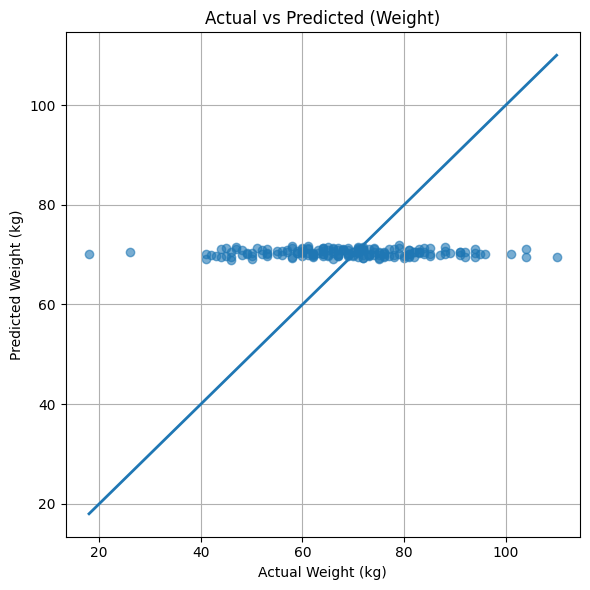

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df2 = pd.read_csv("Cancer.csv")
df2 = df2[['Weight', 'Height', 'Age']].dropna()

X2 = df2[['Height', 'Age']]
y2 = df2['Weight']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

Y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(Y2_test, Y2_pred)
r22 = r2_score(Y2_test, Y2_pred)

print("\n[Linear Regression Results]")
print(f"Intercept: {model2.intercept_:.3f}")
print(f"Coefficient (Height): {model2.coef_[0]:.3f}")
print(f"Coefficient (Age): {model2.coef_[1]:.3f}")
print(f"Mean Squared Error: {mse2:.3f}")
print(f"R^2: {r22:.3f}")

plt.figure(figsize=(6,6))
plt.scatter(Y2_test, Y2_pred, alpha=0.6)
plt.plot([Y2_test.min(), Y2_test.max()], [Y2_test.min(), Y2_test.max()], linewidth=2)
plt.title("Actual vs Predicted (Weight)")
plt.xlabel("Actual Weight (kg)")
plt.ylabel("Predicted Weight (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


Multiple Linear **Regression** with Categorical Features (**Predicting Weight**)

Multiple Linear Regression Results (Predicting Weight):
Mean Squared Error: 223.96
R² Score: -0.0524


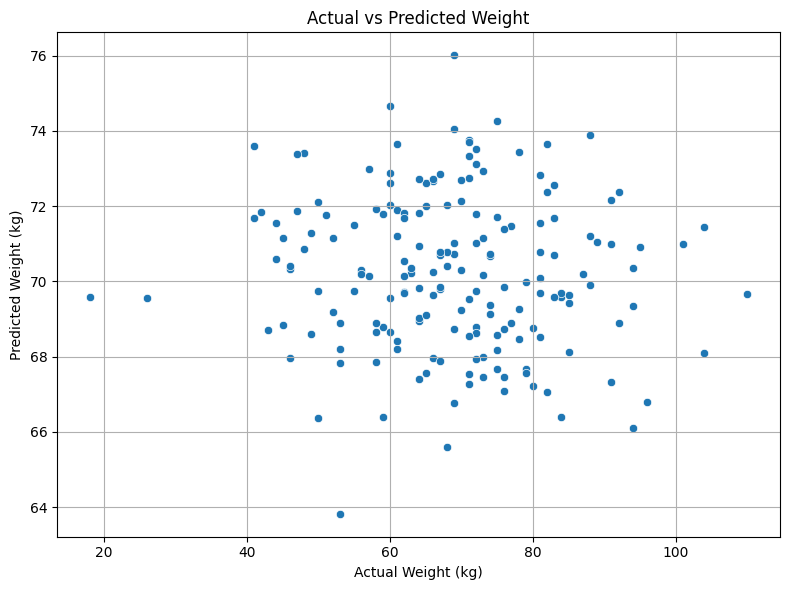


Top 10 Features by |Coefficient|:
Cancer_Type_Lung                3.281
Cancer_Type_Liver               3.085
Cancer_Type_Ovarian             2.771
Cancer_Stage_IV                -2.690
Cancer_Type_Prostate            2.552
Treatment_Type_Radiation       -2.438
Cancer_Type_Leukemia            2.154
Treatment_Type_Immunotherapy   -1.945
Gender_Other                   -1.645
Smoking_Status_Smoker           1.379
dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Cancer.csv").dropna()

y = df['Weight']

feature_cols = ['Age', 'Height', 'Gender', 'Cancer_Type', 'Cancer_Stage',
                'Treatment_Type', 'Smoking_Status', 'Hospital']

X = df[feature_cols]

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Multiple Linear Regression Results (Predicting Weight):")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weight (kg)")
plt.ylabel("Predicted Weight (kg)")
plt.title("Actual vs Predicted Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

coefs = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop 10 Features by |Coefficient|:")
print(coefs.head(10).round(3))


In [17]:
# Load dataset
df = pd.read_csv("Cancer.csv")

# Drop missing values
df = df.dropna()


Data **Preparation** for *Classification*: Creating Weight Classes

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Cancer.csv").dropna()

# Convert Weight into binary classes using median
df['Weight_Class'] = pd.cut(
    df['Weight'],
    bins=[-1, df['Weight'].median(), df['Weight'].max()],
    labels=['Low', 'High']
)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Weight_Class'])

# Features (drop Weight and Weight_Class)
X = df.drop(['Weight', 'Weight_Class'], axis=1)

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

print(" Data prepared successfully")
print("X shape:", X.shape)
print("y distribution:", df['Weight_Class'].value_counts())


 Data prepared successfully
X shape: (900, 24)
y distribution: Weight_Class
Low     466
High    434
Name: count, dtype: int64


**Classification** Model Comparison: Predicting **Weight** Class (Low vs High)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Load + prepare
df = pd.read_csv("Cancer.csv").dropna()


df['Weight_Class'] = pd.cut(
    df['Weight'],
    bins=[-1, df['Weight'].median(), df['Weight'].max()],
    labels=['Low', 'High']
)

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['Weight_Class'])
class_names = le.classes_

# Features (one-hot for categoricals)
feature_cols = ['Age', 'Height', 'Gender', 'Cancer_Type', 'Cancer_Stage',
                'Treatment_Type', 'Smoking_Status', 'Hospital']
X = pd.get_dummies(df[feature_cols], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 3) Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# 4) Train/Eval
# Train/Eval
for name, model in models.items():
    if name in ["Logistic Regression", "K-Nearest Neighbors"]:
        model.fit(X_train_s, y_train)
        predictions = model.predict(X_test_s)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix (rows=true, cols=pred):")

    print(pd.DataFrame(
        cm,
        index=[f"True {c}" for c in class_names],
        columns=[f"Pred {c}" for c in class_names]
    ))

    print("\nClassification Report:")
    print(classification_report(y_test, predictions, target_names=class_names))




Logistic Regression
Accuracy: 0.5000
Confusion Matrix (rows=true, cols=pred):
           Pred High  Pred Low
True High         38        49
True Low          41        52

Classification Report:
              precision    recall  f1-score   support

        High       0.48      0.44      0.46        87
         Low       0.51      0.56      0.54        93

    accuracy                           0.50       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.50      0.50      0.50       180


K-Nearest Neighbors
Accuracy: 0.4556
Confusion Matrix (rows=true, cols=pred):
           Pred High  Pred Low
True High         40        47
True Low          51        42

Classification Report:
              precision    recall  f1-score   support

        High       0.44      0.46      0.45        87
         Low       0.47      0.45      0.46        93

    accuracy                           0.46       180
   macro avg       0.46      0.46      0.46       180
weighted 

Model **Accuracy** Comparison **Chart**

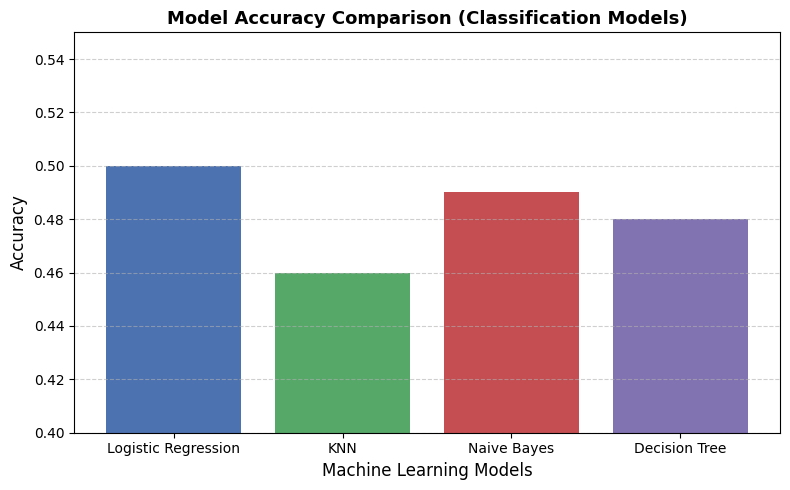

In [20]:
import matplotlib.pyplot as plt

model_names = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree"]
accuracies = [0.50, 0.46, 0.49, 0.48]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# Title and labels
plt.title("Model Accuracy Comparison (Classification Models)", fontsize=13, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Machine Learning Models", fontsize=12)


plt.ylim(0.40, 0.55)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

df = pd.read_csv("Cancer.csv").dropna()

df['Weight_Class'] = pd.cut(
    df['Weight'],
    bins=[-1, df['Weight'].median(), df['Weight'].max()],
    labels=['Low', 'High']
)

print(df[['Weight', 'Weight_Class']].head())


   Weight Weight_Class
0      69          Low
1      90         High
2      66          Low
3      74         High
4      73         High


In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load
df = pd.read_csv("Cancer.csv").dropna(subset=["Weight","Age","Height"])

weight_median = df["Weight"].median()
df["Weight_Class"] = pd.cut(
    df["Weight"],
    bins=[-np.inf, weight_median, np.inf],
    labels=["Low", "High"],
    include_lowest=True
)


feature_cols = ["Age","Height","Gender","Cancer_Type","Cancer_Stage",
                "Treatment_Type","Smoking_Status","Hospital"]
X = pd.get_dummies(df[feature_cols], drop_first=True)
y = df["Weight_Class"].map({"Low":0, "High":1}).astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Best-fit classifier: Logistic Regression
best_model = LogisticRegression(max_iter=1500, class_weight="balanced", n_jobs=-1)
best_model.fit(X_train_s, y_train)

# Evaluate
y_pred = best_model.predict(X_test_s)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Low","High"]))

# ---- Predict new case (same pipeline) ----
new_patient = pd.DataFrame([{
    "Age": 50, "Height": 165,
    "Gender_Male": 1,
    "Cancer_Type_Lung": 0,
    "Cancer_Stage_III": 1,
    "Treatment_Type_Chemotherapy": 1,
    "Smoking_Status_Yes": 0,
    "Hospital_B": 0
}]).reindex(columns=X.columns, fill_value=0)

new_patient_s = scaler.transform(new_patient)
pred_class = best_model.predict(new_patient_s)[0]
print("Predicted Weight Class:", "High" if pred_class==1 else "Low")


Accuracy: 0.4667
Confusion Matrix:
 [[41 52]
 [44 43]]
              precision    recall  f1-score   support

         Low       0.48      0.44      0.46        93
        High       0.45      0.49      0.47        87

    accuracy                           0.47       180
   macro avg       0.47      0.47      0.47       180
weighted avg       0.47      0.47      0.47       180

Predicted Weight Class: Low


In [23]:
import pandas as pd

# Example of a new patient’s data
new_patient = pd.DataFrame([{
    'Age': 50,
    'Height': 165,
    'Gender_Male': 1,
    'Cancer_Type_Lung': 0,
    'Cancer_Stage_III': 1,
    'Treatment_Type_Chemotherapy': 1,
    'Smoking_Status_Yes': 0,
    'Hospital_B': 0
}])

# Align columns with training data
new_patient = new_patient.reindex(columns=X.columns, fill_value=0)

# Predict class using Logistic Regression (best-fit model)
predicted_class_encoded = model.predict(new_patient)[0]
predicted_class = label_encoder.inverse_transform([predicted_class_encoded])[0]

print("Predicted Weight Class for the new patient:", predicted_class)


Predicted Weight Class for the new patient: Low


K-**Means** Clustering on Cancer Dataset (**Weight vs Height**)

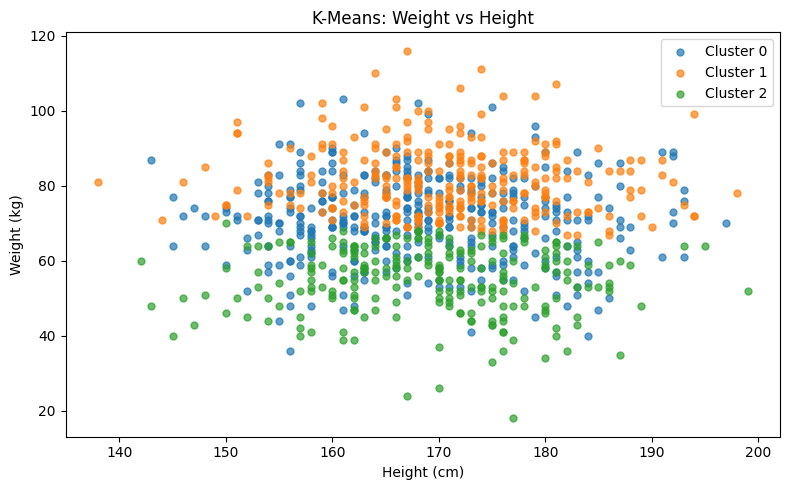

Predicted cluster for new patient: 0


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Cancer.csv").dropna(subset=["Age","Height","Weight"])
cluster_cols = ["Age", "Height", "Weight"]
X = df[cluster_cols].astype(float).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

plt.figure(figsize=(8,5))
for c in sorted(df["Cluster"].unique()):
    sub = df[df["Cluster"] == c]
    plt.scatter(sub["Height"], sub["Weight"], s=25, alpha=0.7, label=f"Cluster {c}")

plt.title("K-Means: Weight vs Height")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.tight_layout()
plt.show()

new_patient = pd.DataFrame([{"Age": 52, "Height": 165, "Weight": 70}], columns=cluster_cols)
new_scaled = scaler.transform(new_patient)
pred_cluster = kmeans.predict(new_scaled)[0]
print("Predicted cluster for new patient:", pred_cluster)


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv("Cancer.csv").dropna()

cluster_cols = ['Age', 'Height', 'Weight']
cluster_data = df[cluster_cols].copy()

scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(scaled)

cluster_data['Cluster'] = labels

new_patient = pd.DataFrame([{
    'Age': 52,
    'Height': 165,
    'Weight': 70
}])

new_patient_scaled = scaler.transform(new_patient[cluster_cols])
predicted_cluster = kmeans.predict(new_patient_scaled)[0]


average_weight = cluster_data[cluster_data['Cluster'] == predicted_cluster]['Weight'].mean()

print(f"Predicted Cluster: {predicted_cluster}")
print(f"Estimated Average Weight in this cluster: {average_weight:.2f} kg")





Predicted Cluster: 0
Estimated Average Weight in this cluster: 71.04 kg


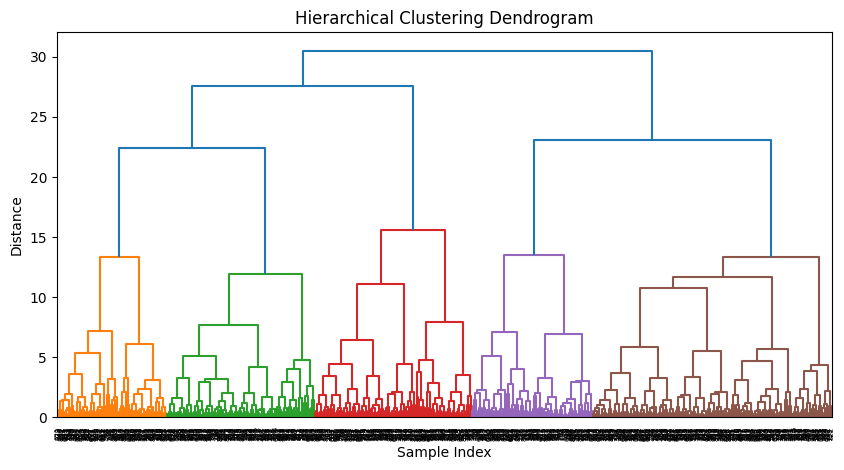

In [37]:
#  Hierarchical Clustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("Cancer.csv").dropna()

cluster_data = df[['Age', 'Height', 'Weight']].copy()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
